In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn import metrics
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
from keras.utils import to_categorical

Using TensorFlow backend.


In [ ]:
data = pd.read_csv('heart.csv')

In [ ]:
#outliers analysis usimg IQR (#identifying the outliers through IQR)
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

age         13.5
sex          1.0
cp           2.0
trestbps    20.0
chol        63.5
fbs          0.0
restecg      1.0
thalach     32.5
exang        1.0
oldpeak      1.6
slope        1.0
ca           1.0
thal         1.0
target       1.0
dtype: float64


In [ ]:
#identification of outliers
print((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR)))

       age    sex     cp  trestbps   chol  ...  oldpeak  slope     ca   thal  target
0    False  False  False     False  False  ...    False  False  False  False   False
1    False  False  False     False  False  ...    False  False  False  False   False
2    False  False  False     False  False  ...    False  False  False  False   False
3    False  False  False     False  False  ...    False  False  False  False   False
4    False  False  False     False  False  ...    False  False  False  False   False
..     ...    ...    ...       ...    ...  ...      ...    ...    ...    ...     ...
298  False  False  False     False  False  ...    False  False  False  False   False
299  False  False  False     False  False  ...    False  False  False  False   False
300  False  False  False     False  False  ...    False  False  False  False   False
301  False  False  False     False  False  ...    False  False  False  False   False
302  False  False  False     False  False  ...    False  False  F

In [ ]:
#removing outliers
df_out = data[~((data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))).any(axis=1)]
print(df_out.shape)

(228, 14)


In [ ]:
#split dataset in features and target variable
feature_cols = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang',
                'oldpeak', 'slope', 'ca', 'thal']
X = df_out[feature_cols] # Features
y = df_out.target # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1) 

In [ ]:
# !pip install tensorflow==2.0

In [ ]:
#create model
model = Sequential() # means ,didn't skip any node or layer

In [ ]:
X_train.shape

(182, 13)

In [ ]:
#get number of columns in training data
n_cols = X_train.shape[1]
n_cols

13

In [ ]:
#add layers to model
model.add(Dense(13, activation='relu', input_dim=n_cols))
model.add(Dense(8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
#compile model using accuracy to measure model performance
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
#set early stopping monitor so the model stops training when it won't improve anymore
early_stopping_monitor = EarlyStopping(patience=3)
#train model
# history = model.fit(X_train, y_train, epochs=150)
history = model.fit(X_train, y_train, epochs=150, callbacks=[early_stopping_monitor])
history

Epoch 1/150
182/182 [==============================] - 0s 778us/step - loss: 5.6903 - accuracy: 0.5714
Epoch 2/150
182/182 [==============================] - 0s 73us/step - loss: 2.2790 - accuracy: 0.5934
Epoch 3/150
182/182 [==============================] - 0s 64us/step - loss: 0.9244 - accuracy: 0.6099
Epoch 4/150
182/182 [==============================] - 0s 58us/step - loss: 1.2937 - accuracy: 0.5165
Epoch 5/150
182/182 [==============================] - 0s 55us/step - loss: 0.8128 - accuracy: 0.6099
Epoch 6/150
182/182 [==============================] - 0s 53us/step - loss: 0.8572 - accuracy: 0.6484
Epoch 7/150
182/182 [==============================] - 0s 67us/step - loss: 0.7621 - accuracy: 0.6429
Epoch 8/150
182/182 [==============================] - 0s 73us/step - loss: 0.7303 - accuracy: 0.6538
Epoch 9/150
182/182 [==============================] - 0s 79us/step - loss: 0.7117 - accuracy: 0.6264
Epoch 10/150
182/182 [==============================] - 0s 74us/step - loss: 0.69

/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:846: RuntimeWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


182/182 [==============================] - 0s 73us/step - loss: 0.6424 - accuracy: 0.6703
Epoch 17/150
182/182 [==============================] - 0s 99us/step - loss: 0.6327 - accuracy: 0.6978
Epoch 18/150
182/182 [==============================] - 0s 66us/step - loss: 0.6297 - accuracy: 0.6923
Epoch 19/150
182/182 [==============================] - 0s 69us/step - loss: 0.6292 - accuracy: 0.6813
Epoch 20/150
182/182 [==============================] - 0s 68us/step - loss: 0.6246 - accuracy: 0.6923
Epoch 21/150
182/182 [==============================] - 0s 62us/step - loss: 0.6227 - accuracy: 0.6978
Epoch 22/150
182/182 [==============================] - 0s 69us/step - loss: 0.6271 - accuracy: 0.6868
Epoch 23/150
182/182 [==============================] - 0s 88us/step - loss: 0.6249 - accuracy: 0.6923
Epoch 24/150
182/182 [==============================] - 0s 64us/step - loss: 0.6157 - accuracy: 0.6923
Epoch 25/150
182/182 [==============================] - 0s 71us/step - loss: 0.6118 - 

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
y_pred = (y_pred > 0.5)

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8260869565217391


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.83      0.79        18
           1       0.88      0.82      0.85        28

    accuracy                           0.83        46
   macro avg       0.82      0.83      0.82        46
weighted avg       0.83      0.83      0.83        46



In [ ]:
confusion_matrix(y_test,y_pred)

array([[15,  3],
       [ 5, 23]])

In [ ]:
history_dict = history.history
print(history_dict.keys())

dict_keys(['loss', 'accuracy'])


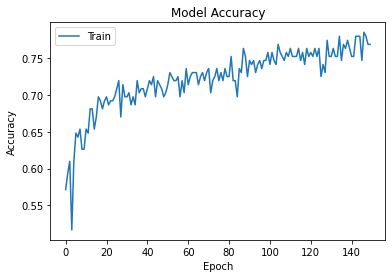

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
#plt.plot(history.history['loss'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train'])
plt.show()